In [2251]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns 

In [2252]:
#Loading the data
df=pd.read_csv("adjusted_car_sales_data.csv")
df

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,VehicleType,Brand,Gender,MaritalStatus,Region,PrevCarDoors,NumKids,YearsOwnedPrevCar
0,54062.495286,38.565768,45291.420487,752.489124,4,SUV,Ford,Female,Single,South,2,3,1
1,54015.530481,NaN,NaN,660.973362,1,SUV,Ford,Female,Married,North,2,1,5
2,55857.873947,40.642949,66194.573906,NaN,2,SUV,Chevy,Male,NaN,North,2,3,9
3,59278.526923,49.468615,77245.033664,696.943714,3,Sedan,Dodge,Female,Married,North,3,0,8
4,54172.771061,32.527827,NaN,742.807659,1,SUV,Ford,Male,Single,North,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,50170.193108,NaN,64203.096965,664.907177,3,SUV,Ford,Female,NaN,East,2,0,6
14996,61649.283525,54.446040,75625.729341,645.047786,3,SUV,Ford,Male,Single,West,4,0,7
14997,65048.398580,34.986327,NaN,NaN,3,SUV,Dodge,Male,Married,East,3,3,6
14998,39785.111087,NaN,73876.296323,590.901358,1,Sedan,Chevy,Female,NaN,West,3,0,2


In [2253]:
df.shape

(15000, 13)

In [2254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PricePaid          15000 non-null  float64
 1   Age                13200 non-null  float64
 2   Income             11700 non-null  float64
 3   CreditScore        13800 non-null  float64
 4   PreviousCarOwned   15000 non-null  int64  
 5   VehicleType        15000 non-null  object 
 6   Brand              15000 non-null  object 
 7   Gender             15000 non-null  object 
 8   MaritalStatus      11850 non-null  object 
 9   Region             15000 non-null  object 
 10  PrevCarDoors       15000 non-null  int64  
 11  NumKids            15000 non-null  int64  
 12  YearsOwnedPrevCar  15000 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1.5+ MB


In [2255]:
from skimpy import skim 
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15000  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ PricePaid           │     0 │     0 │  52000 │   7800 │  22000 │  46000 │  52000 │ 57000 │  80000 │  ▂▇▇▂  │  │
│ │ Age                 │  1800 │    12 │     40 │    9.9 │    3.4 │     33 │     40 │    47 │     85 │  ▃▇▅▁  │  │
│ │ Income              │  3300 │    22 │  75000 │  15000 │   8000 │  65000 │  75000 │ 85000 │ 130000 │  ▁▅▇▂  │  │
│ │ CreditScore         │  1200 │     8 │    700 │     50 │    490 │    670 │    700 │   730 │    890 │  ▁▆▇▂  │  │
│ │ PreviousCarOwned    │     0 │     0 │    2.5 │    1.1 │      1 │      2 │      2 │     3 │      4 │ ▇ ▇ ▇▇ │  │
│ │ PrevCarDoors        │     0 │     0 │      3 │   0.81 │      2 │      2 │      3 │     4 │      4 │ ▇  ▇ ▇ │  │
│ │ NumKids             │     0 │     0 │    1.5 │    1.1 │      0 │      1 │      1 │     2 │      3 │ ▇ ▇ ▇▇ │  │
│ │ YearsOwnedPrevCar   │     0 │     0 │      5 │    2.6 │      1 │      3 │      5 │     7 │      9 │ ▇▃▃▇▃▇ │  │
│ └─────────────────────┴───────┴───────┴────────┴────────┴────────┴────────┴────────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA         ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ VehicleType                 │          0 │          0 │                          1 │                 15000 │  │
│ │ Brand                       │          0 │          0 │                          1 │                 15000 │  │
│ │ Gender                      │          0 │          0 │                          1 │                 15000 │  │
│ │ MaritalStatus               │       3150 │         21 │                       0.79 │                 11850 │  │
│ │ Region                      │          0 │          0 │                          1 │                 15000 │  │
│ └─────────────────────────────┴────────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [2256]:
df.isnull().sum()
#Checking Missing Values

PricePaid               0
Age                  1800
Income               3300
CreditScore          1200
PreviousCarOwned        0
VehicleType             0
Brand                   0
Gender                  0
MaritalStatus        3150
Region                  0
PrevCarDoors            0
NumKids                 0
YearsOwnedPrevCar       0
dtype: int64

In [2257]:
df.describe()

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,PrevCarDoors,NumKids,YearsOwnedPrevCar
count,15000.000000,13200.000000,11700.000000,13800.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,51660.293670,39.987589,74873.847454,699.998693,2.498867,2.996133,1.498533,4.959533
std,7754.215892,9.942739,14999.835590,50.384894,1.116400,0.814225,1.116280,2.568671
min,21684.959135,3.449135,8015.942047,492.113306,1.000000,2.000000,0.000000,1.000000
25%,45952.671536,33.163091,64656.465821,666.145753,2.000000,2.000000,1.000000,3.000000
50%,51672.421430,40.018730,74928.179825,700.317792,2.000000,3.000000,1.000000,5.000000
75%,57160.478216,46.799801,85153.798697,734.092581,3.000000,4.000000,2.000000,7.000000
max,79751.016065,84.790843,130917.500171,887.268961,4.000000,4.000000,3.000000,9.000000


In [2258]:
df.duplicated().sum()
#No duplicate Values

0

In [2259]:
#Handling outliers first. Reason for choosing outlier removal before handling missing value is outlier can effect the imputation process 

In [2260]:
df.describe()["Age"]


count    13200.000000
mean        39.987589
std          9.942739
min          3.449135
25%         33.163091
50%         40.018730
75%         46.799801
max         84.790843
Name: Age, dtype: float64

C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


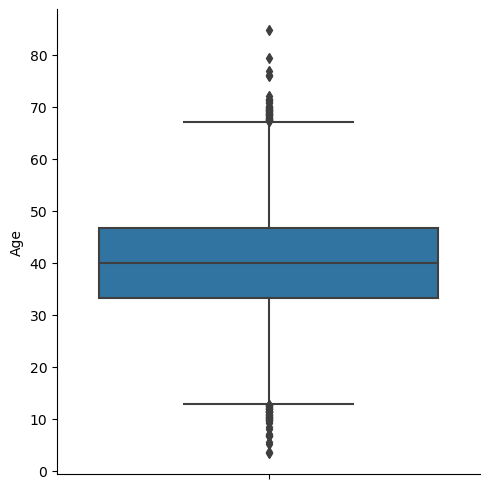

In [2261]:
sns.catplot(data=df, y="Age", kind="box", orient="v")

In [2262]:

# Calculate Q1, Q3, and IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')


Lower Bound: 12.70802514943533
Upper Bound: 67.25486611772747


In [2263]:

from scipy import stats

# Calculate Z-scores for the 'Age' column
z_scores = stats.zscore(df['Age'].dropna())

# Create a DataFrame with Z-scores
z_scores_df = pd.DataFrame({'Age': df['Age'].dropna(), 'Z-score': z_scores})

# Define outlier thresholds
threshold = 3

# Calculate bounds for outliers
lower_bound = df['Age'].mean() - (threshold * df['Age'].std())
upper_bound = df['Age'].mean() + (threshold * df['Age'].std())

# Identify outliers based on Z-score
outliers = z_scores_df[(z_scores_df['Z-score'] > threshold) | (z_scores_df['Z-score'] < -threshold)]

# Display outlier ages and their Z-scores
print("Outlier Ages and Their Z-Scores:")
print(outliers)

# Print the ranges of outlier ages
print(f"\nAge below lower bound ({lower_bound}): {z_scores_df[z_scores_df['Age'] < lower_bound]['Age'].min()} - {z_scores_df[z_scores_df['Age'] < lower_bound]['Age'].max()}")
print(f"Age above upper bound ({upper_bound}): {z_scores_df[z_scores_df['Age'] > upper_bound]['Age'].min()} - {z_scores_df[z_scores_df['Age'] > upper_bound]['Age'].max()}")


Outlier Ages and Their Z-Scores:
             Age   Z-score
162     3.647998 -3.655026
308     9.057108 -3.110979
558     6.921000 -3.325828
843    84.790843  4.506299
2380   70.713367  3.090390
2436   70.966955  3.115896
2894   10.047331 -3.011383
3119    9.894775 -3.026727
3214    6.640985 -3.353992
3363   69.971983  3.015822
3851   79.423310  3.966434
4852    6.651073 -3.352977
5126   76.028321  3.624967
5233    8.007354 -3.216563
6620   76.113501  3.633534
7358    7.044388 -3.313418
7494    3.449135 -3.675027
8189   69.987341  3.017367
8355   71.366860  3.156118
9611    5.049548 -3.514058
9688   10.093986 -3.006690
10438   9.794241 -3.036839
10647  72.153742  3.235263
10777   9.446821 -3.071782
11684   9.906589 -3.025539
11914  71.589418  3.178503
12098   9.442911 -3.072175
12486  71.323262  3.151733
13515  70.137933  3.032513
13552  76.916245  3.714274
13790   5.466459 -3.472126
14399   8.409120 -3.176154

Age below lower bound (10.159372780302917): 3.4491348489589413 - 10.0939855

In [2264]:
df[df["Age"]<18]

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,VehicleType,Brand,Gender,MaritalStatus,Region,PrevCarDoors,NumKids,YearsOwnedPrevCar
84,50639.041087,15.846367,68640.612638,690.872392,4,SUV,Chevy,Female,Married,South,2,1,5
86,54813.738809,17.704244,62367.543541,NaN,4,Sedan,Dodge,Male,Single,East,2,0,5
162,55896.775863,3.647998,79993.338440,605.223206,4,Sedan,Dodge,Male,Single,North,4,0,5
275,60826.962519,10.637991,NaN,701.453020,2,SUV,Dodge,Male,Married,South,2,3,8
300,42355.291818,15.688788,NaN,700.644106,3,Sedan,Chevy,Female,Married,South,4,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,50654.554360,15.092483,NaN,757.555285,4,Sedan,Chevy,Male,NaN,East,2,3,9
14789,44903.691095,16.034505,74988.013358,763.826409,4,Sedan,Ford,Female,Married,East,2,3,6
14811,65569.072759,16.693365,85754.831431,678.774903,4,SUV,Dodge,Male,Married,East,2,0,5
14842,64271.595464,17.518691,91558.586340,709.930822,2,SUV,Chevy,Female,Single,North,4,1,3


In [2265]:
df[df['Age'] < 18].shape


(179, 13)

In [2266]:
#As the income distribution for the people with age below 18 seems unrealistic, deleting those entries


In [2267]:
df[df["Age"]<20].describe()

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,PrevCarDoors,NumKids,YearsOwnedPrevCar
count,285.000000,285.000000,213.000000,260.000000,285.000000,285.000000,285.000000,285.000000
mean,52375.122983,16.303823,77093.341519,699.253347,2.568421,3.010526,1.435088,4.933333
std,7856.421799,3.283634,14928.377098,51.693951,1.103636,0.802655,1.129080,2.580898
min,32071.325486,3.449135,39546.460321,555.048225,1.000000,2.000000,0.000000,1.000000
25%,46634.321982,14.811690,67033.154658,671.163875,2.000000,2.000000,0.000000,3.000000
50%,51991.247407,17.063380,77143.537908,701.333170,3.000000,3.000000,1.000000,5.000000
75%,58278.273528,18.863566,86796.451622,734.249704,4.000000,4.000000,2.000000,7.000000
max,74598.872725,19.993121,112822.866461,887.268961,4.000000,4.000000,3.000000,9.000000


C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


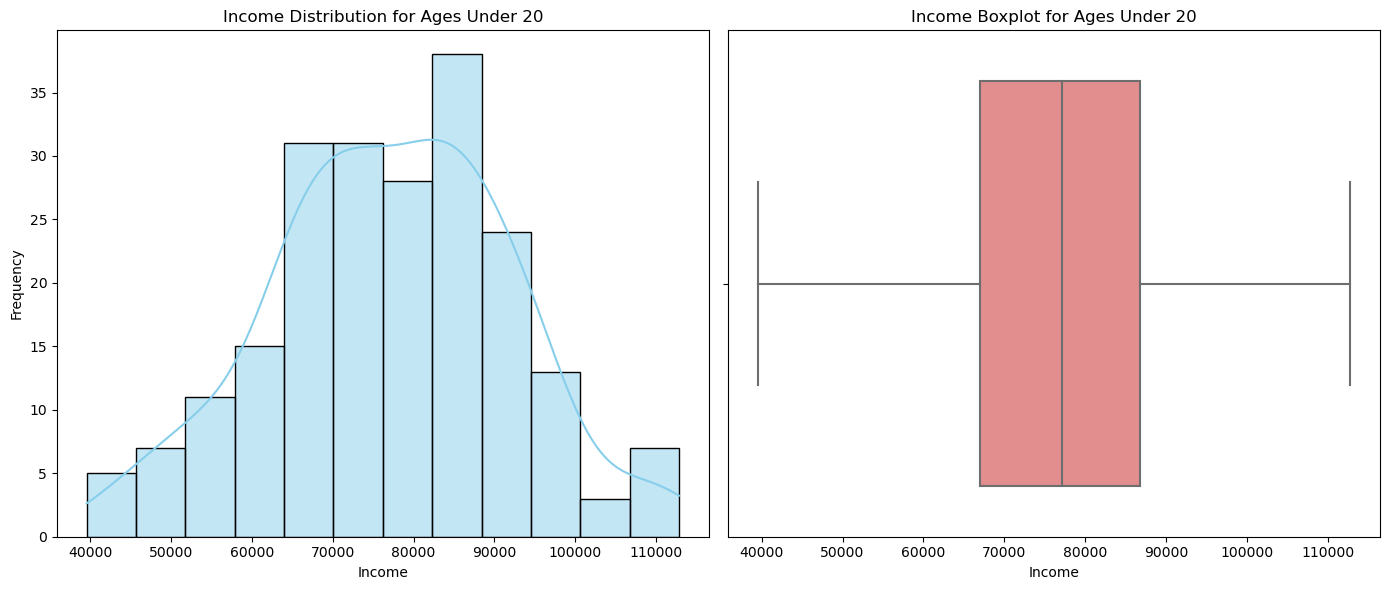

In [2268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe for ages under 20
df_under_20 = df[df["Age"] < 20]

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Income for ages under 20
sns.histplot(df_under_20['Income'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Income Distribution for Ages Under 20')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Frequency')

# Boxplot of Income for ages under 20
sns.boxplot(x=df_under_20['Income'], ax=ax[1], color='lightcoral')
ax[1].set_title('Income Boxplot for Ages Under 20')
ax[1].set_xlabel('Income')

# Show the plots
plt.tight_layout()
plt.show()


In [2269]:
df[df["Age"]<20]

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,VehicleType,Brand,Gender,MaritalStatus,Region,PrevCarDoors,NumKids,YearsOwnedPrevCar
57,50499.925039,19.250403,65109.264968,626.753021,2,SUV,Chevy,Male,Married,North,3,2,7
84,50639.041087,15.846367,68640.612638,690.872392,4,SUV,Chevy,Female,Married,South,2,1,5
86,54813.738809,17.704244,62367.543541,NaN,4,Sedan,Dodge,Male,Single,East,2,0,5
89,59288.608218,18.429633,84962.899054,661.299057,2,SUV,Ford,Male,Married,West,3,0,7
162,55896.775863,3.647998,79993.338440,605.223206,4,Sedan,Dodge,Male,Single,North,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,65569.072759,16.693365,85754.831431,678.774903,4,SUV,Dodge,Male,Married,East,2,0,5
14842,64271.595464,17.518691,91558.586340,709.930822,2,SUV,Chevy,Female,Single,North,4,1,3
14871,47814.152157,19.697248,NaN,NaN,2,Sedan,Ford,Male,Single,North,2,3,1
14892,49170.551468,19.505615,74259.004806,744.411786,4,Sedan,Ford,Female,Single,South,3,1,2


In [2270]:
df.shape

(15000, 13)

In [2271]:
df=df[~(df["Age"]<20)]
# Remove records where Age is under 18
# Reason: Individuals under 18 are not legally eligible to make significant purchasing decisions, such as buying a car.
# Remove records where Age is under 20
# Reason: Although individuals under 20 can legally make purchases, data from this age group may be less representative of typical car buyers. 
# The distribution of income and other attributes for this group may differ significantly, potentially leading to anomalies and skewed analysis.

In [2272]:
df

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,VehicleType,Brand,Gender,MaritalStatus,Region,PrevCarDoors,NumKids,YearsOwnedPrevCar
0,54062.495286,38.565768,45291.420487,752.489124,4,SUV,Ford,Female,Single,South,2,3,1
1,54015.530481,NaN,NaN,660.973362,1,SUV,Ford,Female,Married,North,2,1,5
2,55857.873947,40.642949,66194.573906,NaN,2,SUV,Chevy,Male,NaN,North,2,3,9
3,59278.526923,49.468615,77245.033664,696.943714,3,Sedan,Dodge,Female,Married,North,3,0,8
4,54172.771061,32.527827,NaN,742.807659,1,SUV,Ford,Male,Single,North,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,50170.193108,NaN,64203.096965,664.907177,3,SUV,Ford,Female,NaN,East,2,0,6
14996,61649.283525,54.446040,75625.729341,645.047786,3,SUV,Ford,Male,Single,West,4,0,7
14997,65048.398580,34.986327,NaN,NaN,3,SUV,Dodge,Male,Married,East,3,3,6
14998,39785.111087,NaN,73876.296323,590.901358,1,Sedan,Chevy,Female,NaN,West,3,0,2


In [2273]:
df.isnull().mean()*100

PricePaid             0.000000
Age                  12.232416
Income               21.936799
CreditScore           7.985049
PreviousCarOwned      0.000000
VehicleType           0.000000
Brand                 0.000000
Gender                0.000000
MaritalStatus        21.039755
Region                0.000000
PrevCarDoors          0.000000
NumKids               0.000000
YearsOwnedPrevCar     0.000000
dtype: float64

In [2274]:
df["NumKids"].value_counts()

NumKids
1    3717
2    3674
3    3668
0    3656
Name: count, dtype: int64

In [2275]:
df["YearsOwnedPrevCar"].value_counts()

YearsOwnedPrevCar
6    1703
2    1692
3    1660
5    1656
1    1627
4    1627
7    1593
9    1583
8    1574
Name: count, dtype: int64

C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

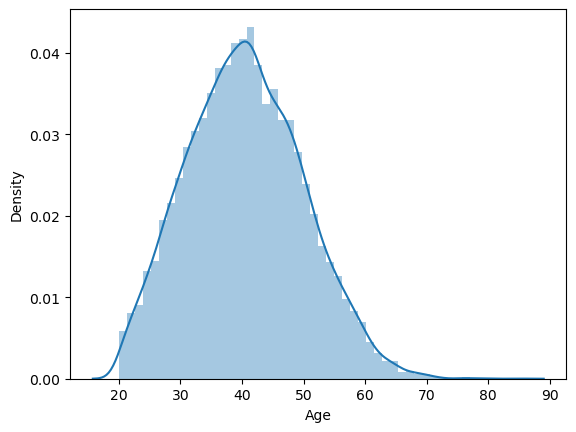

In [2276]:
sns.distplot(df["Age"])

C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\1940225258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ImputedAge'] = df.groupby(['NumKids', 'YearsOwnedPrevCar'])['Age'].transform(lambda x: x.fillna(x.mean()))
C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\1940225258.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ImputedAge'])
C:\Users\guriv\anaconda3\Lib\site-packages\seabor

<Axes: xlabel='ImputedAge', ylabel='Density'>

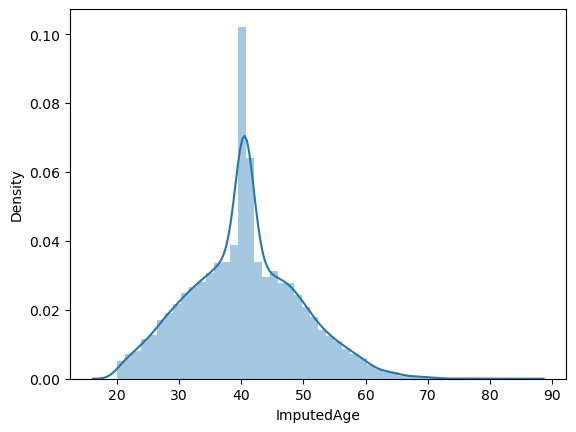

In [2277]:
df['ImputedAge'] = df.groupby(['NumKids', 'YearsOwnedPrevCar'])['Age'].transform(lambda x: x.fillna(x.mean()))

# Plot distribution of imputed Age
sns.distplot(df['ImputedAge'])
# None of the groups worked for group mean imputation as all the groups have a 0.6 std variation of age


In [2278]:
from sklearn.impute import KNNImputer

#As we can see the distribution is being distorted so not to choose group mean and using KNN imputer method as algorithmic approach for imputation
# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Create a copy of the DataFrame with only the columns needed
df_features = df[['Age', 'Income', 'CreditScore', 'PreviousCarOwned']]

# Apply KNN imputation
df_features_imputed = pd.DataFrame(knn_imputer.fit_transform(df_features), columns=df_features.columns)

# Update the original DataFrame with imputed values
df['Age'] = df_features_imputed['Age']




C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\2234862326.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df_features_imputed['Age']


C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\171247583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

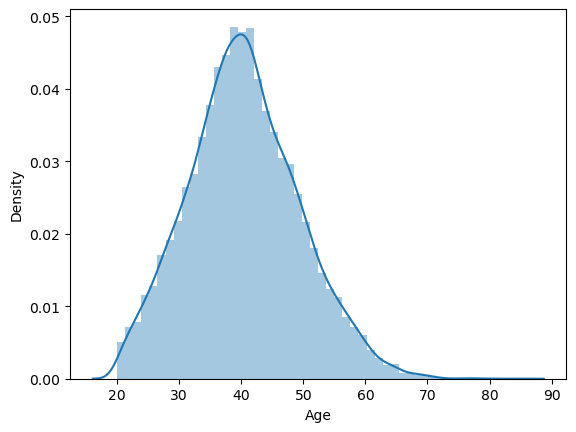

In [2279]:
sns.distplot(df["Age"])
#The distribution remain same suggesting to use KNN imputer method 

In [2280]:
df["Age"]=df["Age"].fillna(np.mean(df["Age"]))

C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\3253134090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=df["Age"].fillna(np.mean(df["Age"]))


In [2281]:
df.isnull().sum()

PricePaid               0
Age                     0
Income               3228
CreditScore          1175
PreviousCarOwned        0
VehicleType             0
Brand                   0
Gender                  0
MaritalStatus        3096
Region                  0
PrevCarDoors            0
NumKids                 0
YearsOwnedPrevCar       0
ImputedAge              0
dtype: int64

In [2282]:
#Marital Status imputation 


In [2283]:
df["MaritalStatus"].value_counts()

MaritalStatus
Single     5837
Married    5782
Name: count, dtype: int64

In [2284]:
df['MaritalStatus'] = df.groupby('YearsOwnedPrevCar')['MaritalStatus'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)
df['MaritalStatus'].isnull().sum()

C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\2258909590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MaritalStatus'] = df.groupby('YearsOwnedPrevCar')['MaritalStatus'].transform(


0

C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\1363291500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income', ylabel='Density'>

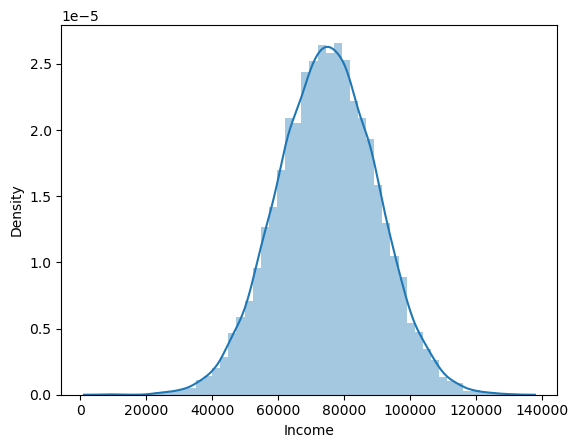

In [2285]:
sns.distplot(df["Income"])

In [2286]:
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the numeric columns
numeric_columns = ['Income', 'CreditScore']
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
df.isnull().sum()

C:\Users\guriv\AppData\Local\Temp\ipykernel_10764\2338884066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


PricePaid            0
Age                  0
Income               0
CreditScore          0
PreviousCarOwned     0
VehicleType          0
Brand                0
Gender               0
MaritalStatus        0
Region               0
PrevCarDoors         0
NumKids              0
YearsOwnedPrevCar    0
ImputedAge           0
dtype: int64

In [2287]:
df

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,VehicleType,Brand,Gender,MaritalStatus,Region,PrevCarDoors,NumKids,YearsOwnedPrevCar,ImputedAge
0,54062.495286,38.565768,45291.420487,752.489124,4,SUV,Ford,Female,Single,South,2,3,1,38.565768
1,54015.530481,36.277913,77380.079295,660.973362,1,SUV,Ford,Female,Married,North,2,1,5,39.409859
2,55857.873947,40.642949,66194.573906,721.369868,2,SUV,Chevy,Male,Married,North,2,3,9,40.642949
3,59278.526923,49.468615,77245.033664,696.943714,3,Sedan,Dodge,Female,Married,North,3,0,8,49.468615
4,54172.771061,32.527827,74610.631643,742.807659,1,SUV,Ford,Male,Single,North,2,2,4,32.527827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,50170.193108,40.399036,64203.096965,664.907177,3,SUV,Ford,Female,Single,East,2,0,6,40.590175
14996,61649.283525,40.399036,75625.729341,645.047786,3,SUV,Ford,Male,Single,West,4,0,7,54.446040
14997,65048.398580,40.399036,74832.692040,700.013006,3,SUV,Dodge,Male,Married,East,3,3,6,34.986327
14998,39785.111087,40.399036,73876.296323,590.901358,1,Sedan,Chevy,Female,Married,West,3,0,2,41.548206


In [2288]:
#EDA 

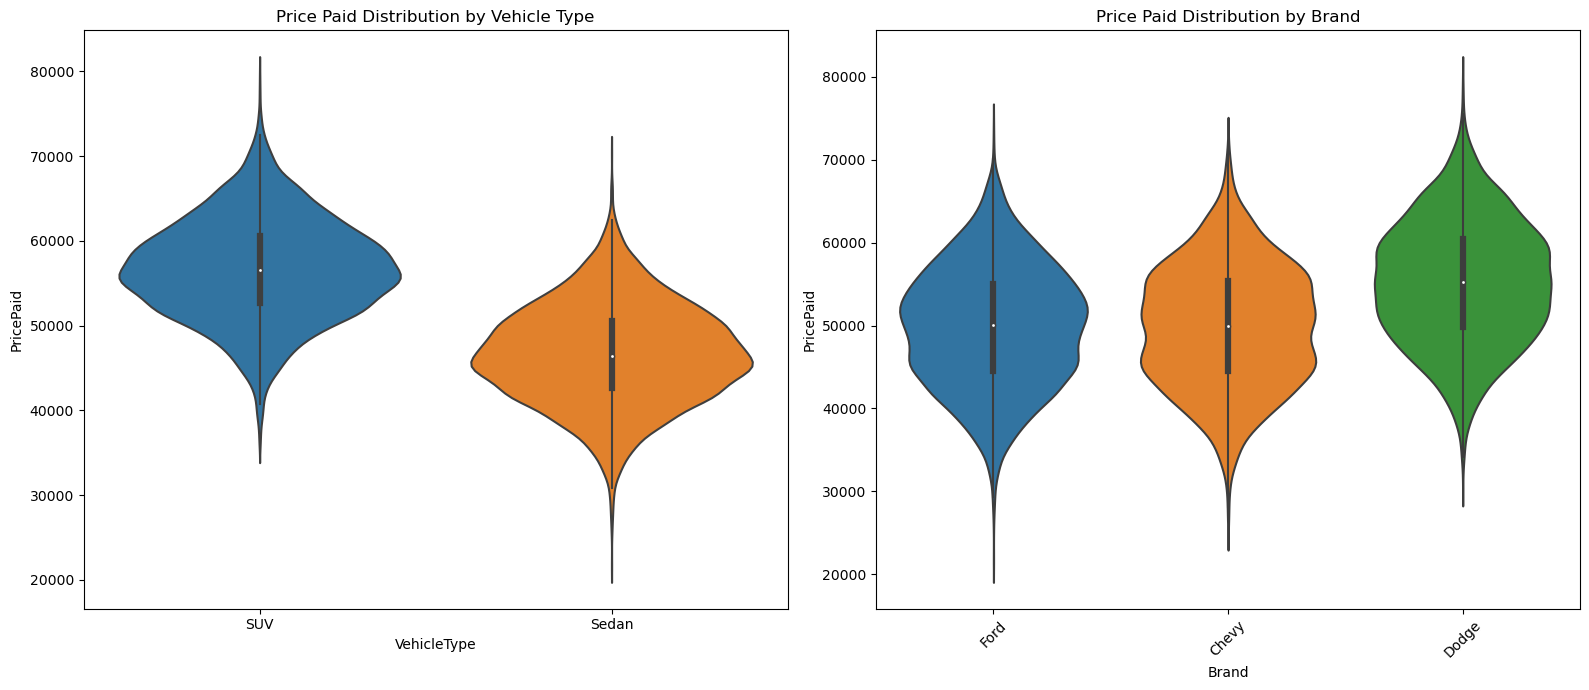

In [2289]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Violin plot for Price Paid by Vehicle Type
sns.violinplot(x='VehicleType', y='PricePaid', data=df, ax=ax[0])
ax[0].set_title('Price Paid Distribution by Vehicle Type')

# Violin plot for Price Paid by Brand
sns.violinplot(x='Brand', y='PricePaid', data=df, ax=ax[1])
ax[1].set_title('Price Paid Distribution by Brand')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


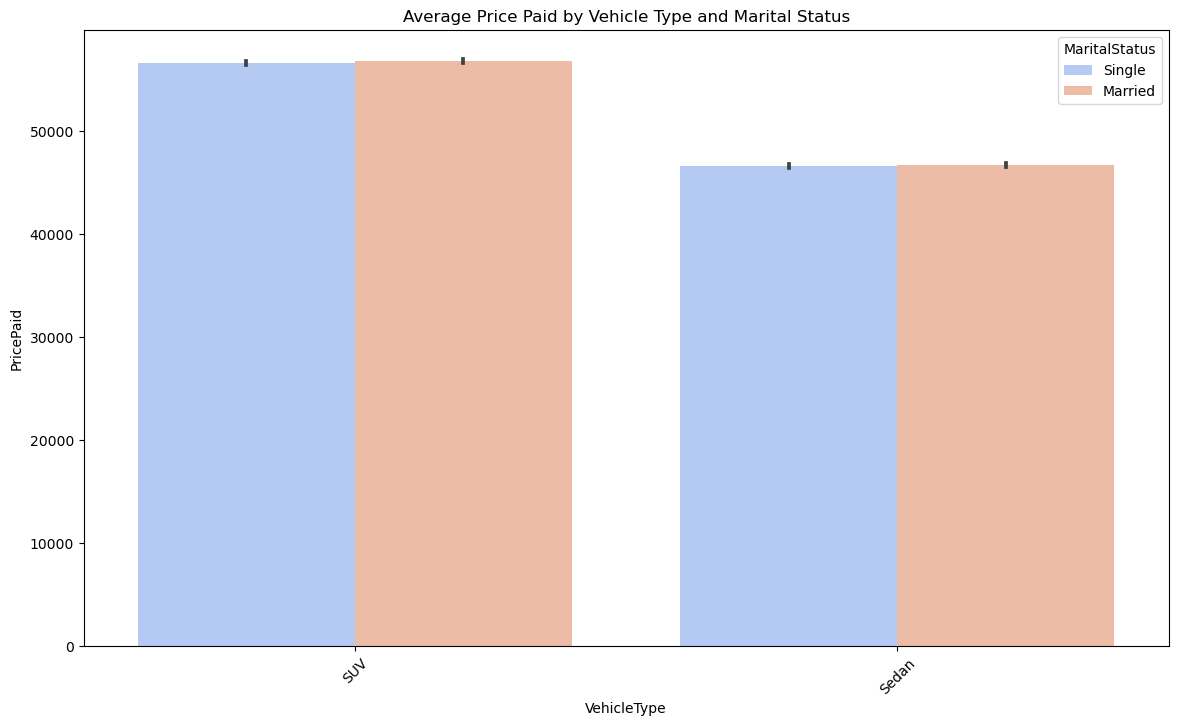

In [2290]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.barplot(x='VehicleType', y='PricePaid', hue='MaritalStatus', data=df, estimator='mean', palette='coolwarm')
plt.title('Average Price Paid by Vehicle Type and Marital Status')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='MaritalStatus', ylabel='PricePaid'>

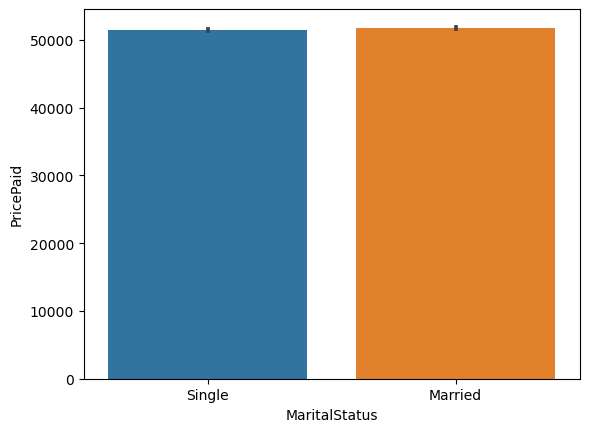

In [2291]:
sns.barplot(df,x="MaritalStatus",y="PricePaid")

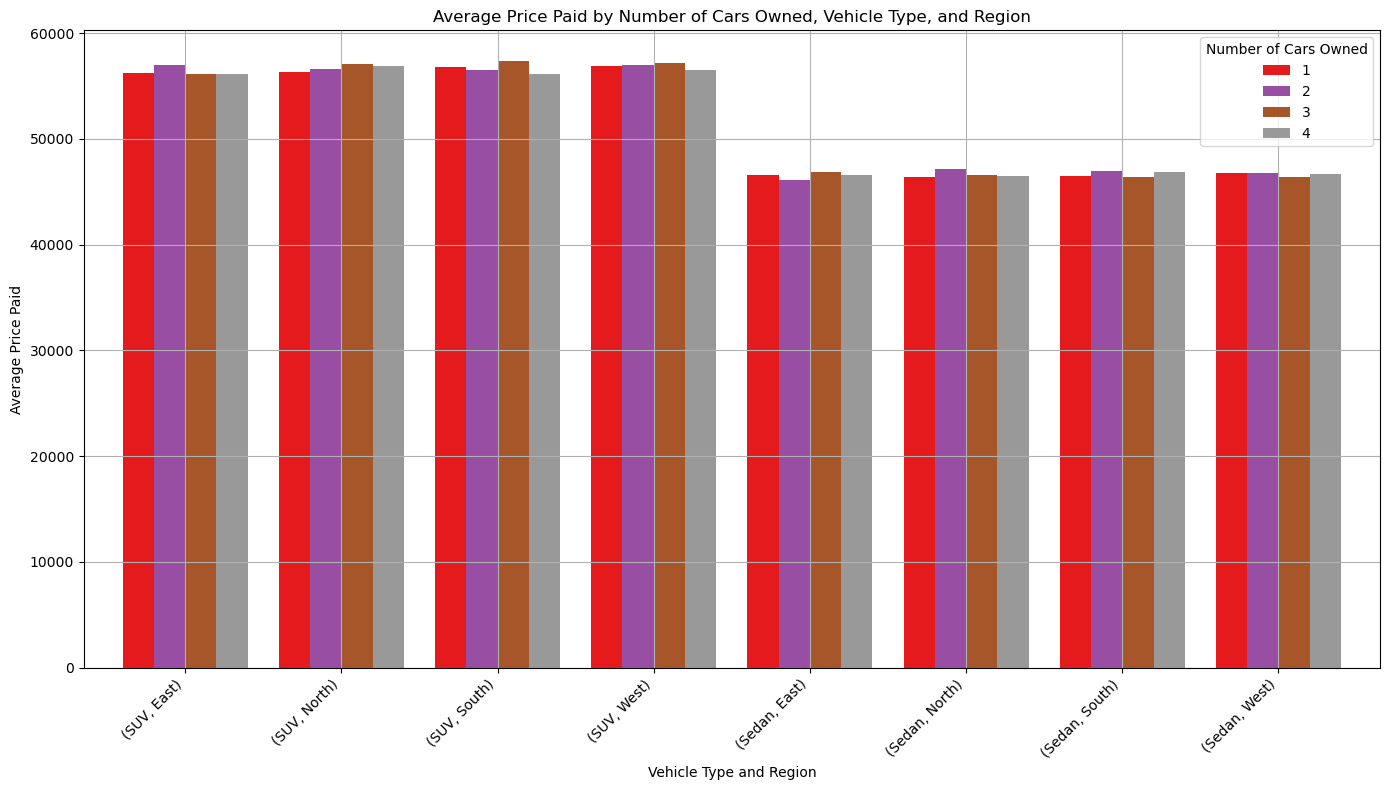

In [2292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by categorical variables and calculate the average PricePaid
grouped_data = df.groupby(['PreviousCarOwned', 'VehicleType', 'Region'])['PricePaid'].mean().reset_index()

# Create a pivot table for the bar chart
pivot_table = grouped_data.pivot_table(index=['VehicleType', 'Region'], columns='PreviousCarOwned', values='PricePaid')

# Plot
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', width=0.8, colormap='Set1', ax=plt.gca())

# Add plot labels and title
plt.title('Average Price Paid by Number of Cars Owned, Vehicle Type, and Region')
plt.xlabel('Vehicle Type and Region')
plt.ylabel('Average Price Paid')
plt.legend(title='Number of Cars Owned')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [2293]:
df


,PricePaid,Age,Income,CreditScore,PreviousCarOwned,VehicleType,Brand,Gender,MaritalStatus,Region,PrevCarDoors,NumKids,YearsOwnedPrevCar,ImputedAge
0,54062.495286,38.565768,45291.420487,752.489124,4,SUV,Ford,Female,Single,South,2,3,1,38.565768
1,54015.530481,36.277913,77380.079295,660.973362,1,SUV,Ford,Female,Married,North,2,1,5,39.409859
2,55857.873947,40.642949,66194.573906,721.369868,2,SUV,Chevy,Male,Married,North,2,3,9,40.642949
3,59278.526923,49.468615,77245.033664,696.943714,3,Sedan,Dodge,Female,Married,North,3,0,8,49.468615
4,54172.771061,32.527827,74610.631643,742.807659,1,SUV,Ford,Male,Single,North,2,2,4,32.527827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,50170.193108,40.399036,64203.096965,664.907177,3,SUV,Ford,Female,Single,East,2,0,6,40.590175
14996,61649.283525,40.399036,75625.729341,645.047786,3,SUV,Ford,Male,Single,West,4,0,7,54.446040
14997,65048.398580,40.399036,74832.692040,700.013006,3,SUV,Dodge,Male,Married,East,3,3,6,34.986327
14998,39785.111087,40.399036,73876.296323,590.901358,1,Sedan,Chevy,Female,Married,West,3,0,2,41.548206


In [2294]:
from sklearn.preprocessing import OrdinalEncoder

# Define the desired order of the categories
vehicle_type_order = [['Sedan', 'SUV']]

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=vehicle_type_order, handle_unknown='use_encoded_value', unknown_value=-1)

# Apply the encoder to the DataFrame using .loc to avoid the SettingWithCopyWarning
df.loc[:, 'VehicleType'] = ordinal_encoder.fit_transform(df[['VehicleType']])


In [2295]:
df=df.reset_index(drop=True)

In [2296]:
# Initialize OneHotEncoder with drop='first'
ohe_encoder = OneHotEncoder(drop='first', sparse_output=False)



In [2297]:
# Fit and transform the categorical columns except 'VehicleType'
# Select categorical columns
categorical_columns = ['Brand', 'Gender', 'MaritalStatus', 'Region']
ohe_encoder.fit(df[categorical_columns])
encoded_data = ohe_encoder.fit_transform(df[categorical_columns])
encoded_data


array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [2298]:
# Create DataFrame with the encoded data
# Fit the encoder to the categorical columns
# Create DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=ohe_encoder.get_feature_names_out(categorical_columns))
encoded_df

,Brand_Dodge,Brand_Ford,Gender_Male,MaritalStatus_Single,Region_North,Region_South,Region_West
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
14710,0.0,1.0,0.0,1.0,0.0,0.0,0.0
14711,0.0,1.0,1.0,1.0,0.0,0.0,1.0
14712,1.0,0.0,1.0,0.0,0.0,0.0,0.0
14713,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [2299]:
# Drop the original categorical columns from df and concatenate with the new encoded DataFrame
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the DataFrame with one-hot encoding
df.drop(columns="ImputedAge",inplace = True)


In [2300]:
#Feature selection

In [2301]:
#Checking Multicolinearity

In [2302]:
df

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,VehicleType,PrevCarDoors,NumKids,YearsOwnedPrevCar,Brand_Dodge,Brand_Ford,Gender_Male,MaritalStatus_Single,Region_North,Region_South,Region_West
0,54062.495286,38.565768,45291.420487,752.489124,4,1.0,2,3,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,54015.530481,36.277913,77380.079295,660.973362,1,1.0,2,1,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,55857.873947,40.642949,66194.573906,721.369868,2,1.0,2,3,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,59278.526923,49.468615,77245.033664,696.943714,3,0.0,3,0,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,54172.771061,32.527827,74610.631643,742.807659,1,1.0,2,2,4,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,50170.193108,40.399036,64203.096965,664.907177,3,1.0,2,0,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0
14711,61649.283525,40.399036,75625.729341,645.047786,3,1.0,4,0,7,0.0,1.0,1.0,1.0,0.0,0.0,1.0
14712,65048.398580,40.399036,74832.692040,700.013006,3,1.0,3,3,6,1.0,0.0,1.0,0.0,0.0,0.0,0.0
14713,39785.111087,40.399036,73876.296323,590.901358,1,0.0,3,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

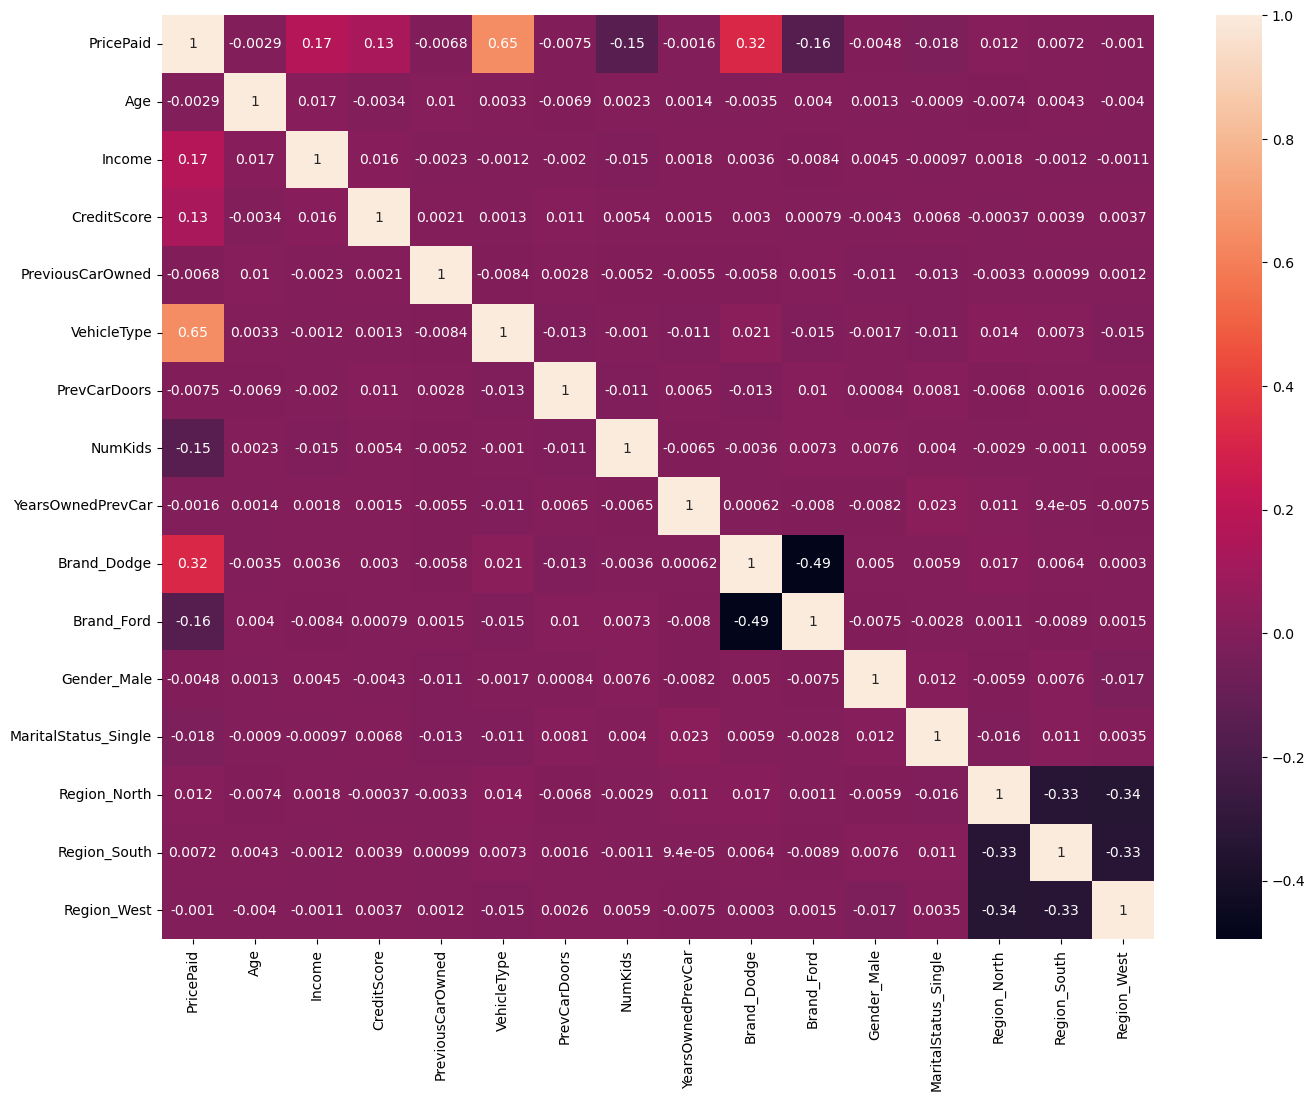

In [2303]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)

In [2304]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your preprocessed DataFrame
# Dropping the target column 'PricePaid' for VIF calculation
X = df.drop(columns='PricePaid')

# Ensure all data is numeric and there are no NaN values
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF and display the result
vif_df = calculate_vif(X)
vif_df


,Feature,VIF
0,Age,20.346514
1,Income,28.404909
2,CreditScore,61.043240
3,PreviousCarOwned,5.903573
4,VehicleType,1.989196
5,PrevCarDoors,13.894187
6,NumKids,2.789190
7,YearsOwnedPrevCar,4.675393
8,Brand_Dodge,1.980102
9,Brand_Ford,1.963461


In [2314]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame after preprocessing
# Splitting the data into features and target variable
X = df.drop(columns='PricePaid')
y = df['PricePaid']

# Convert VehicleType to numeric
X['VehicleType'] = pd.to_numeric(X['VehicleType'], errors='coerce')

# Add a constant to the model (intercept)
X_with_const = sm.add_constant(X)

# Fit the model with all features
model = sm.OLS(y, X_with_const).fit()

# Get the p-values and exclude the constant term
pvalues = model.pvalues[1:]

# Create a DataFrame with feature names and their p-values
pvalues_df = pd.DataFrame({
    'Feature': X.columns,
    'P-Value': pvalues.values
})

# Display the DataFrame
print(pvalues_df)




                 Feature        P-Value
0                    Age   2.718623e-01
1                 Income  6.516252e-200
2            CreditScore  5.487130e-121
3       PreviousCarOwned   9.394649e-01
4            VehicleType   0.000000e+00
5           PrevCarDoors   6.599433e-01
6                NumKids  1.312608e-158
7      YearsOwnedPrevCar   4.057331e-01
8            Brand_Dodge   0.000000e+00
9             Brand_Ford   2.816425e-01
10           Gender_Male   4.614928e-01
11  MaritalStatus_Single   1.947295e-02
12          Region_North   7.629386e-01
13          Region_South   4.701815e-01
14           Region_West   8.474217e-02


In [2306]:
df

,PricePaid,Age,Income,CreditScore,PreviousCarOwned,VehicleType,PrevCarDoors,NumKids,YearsOwnedPrevCar,Brand_Dodge,Brand_Ford,Gender_Male,MaritalStatus_Single,Region_North,Region_South,Region_West
0,54062.495286,38.565768,45291.420487,752.489124,4,1.0,2,3,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,54015.530481,36.277913,77380.079295,660.973362,1,1.0,2,1,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,55857.873947,40.642949,66194.573906,721.369868,2,1.0,2,3,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,59278.526923,49.468615,77245.033664,696.943714,3,0.0,3,0,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,54172.771061,32.527827,74610.631643,742.807659,1,1.0,2,2,4,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,50170.193108,40.399036,64203.096965,664.907177,3,1.0,2,0,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0
14711,61649.283525,40.399036,75625.729341,645.047786,3,1.0,4,0,7,0.0,1.0,1.0,1.0,0.0,0.0,1.0
14712,65048.398580,40.399036,74832.692040,700.013006,3,1.0,3,3,6,1.0,0.0,1.0,0.0,0.0,0.0,0.0
14713,39785.111087,40.399036,73876.296323,590.901358,1,0.0,3,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [2307]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2313]:
# Splitting the data into features and target variable
X = df.drop(columns='PricePaid')
y = df['PricePaid']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# First model: Using all variables
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_all = model_all.predict(X_test)
r2_all = model_all.score(X_test, y_test)

# Use statsmodels to calculate AIC
X_train_all = sm.add_constant(X_train)
model_all_sm = sm.OLS(y_train, X_train_all).fit()
aic_all = model_all_sm.aic
print(model_all_sm.summary())

# Display the R-squared and AIC for the model using all variables
print(f'R-squared for the model using all variables: {r2_all}')
print(f'AIC for the model using all variables: {aic_all}')


                            OLS Regression Results                            
Dep. Variable:              PricePaid   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     1083.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        02:23:08   Log-Likelihood:            -1.1703e+05
No. Observations:               11772   AIC:                         2.341e+05
Df Residuals:                   11756   BIC:                         2.342e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.164e+04     46.362   1113.867      0.0

In [2309]:
# Splitting the data into features and target variable
X = df.drop(columns='PricePaid')
y = df['PricePaid']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# First model: Using all variables
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_all = model_all.predict(X_test)
r2_all = model_all.score(X_test, y_test)

# Use statsmodels to calculate AIC
X_train_all = sm.add_constant(X_train)
model_all_sm = sm.OLS(y_train, X_train_all).fit()
aic_all = model_all_sm.aic

# Display the R-squared and AIC for the model using all variables
print(f'R-squared for the model using all variables: {r2_all}')
print(f'AIC for the model using all variables: {aic_all}')

# Second model: Stepwise selection based on p-value and AIC
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.10, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]], index=y.index))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6}')
                print(f'Current included features: {included}')
                print(f'Current p-values: {model.pvalues}')

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included], index=y.index))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature:30} with p-value {worst_pval:.6}')
                print(f'Current included features: {included}')
                print(f'Current p-values: {model.pvalues}')
        if not changed:
            break
    return included

# Convert to DataFrame with appropriate column names
X_train_df = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_test_df = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

# Perform stepwise selection
selected_features = stepwise_selection(X_train_df, y_train)

# Train the second model with selected features
X_train_selected = X_train_df[selected_features]
X_test_selected = X_test_df[selected_features]

model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Predict and evaluate the second model
y_pred_selected = model_selected.predict(X_test_selected)
r2_selected = model_selected.score(X_test_selected, y_test)

# Use statsmodels to calculate AIC for the second model
X_train_selected_sm = sm.add_constant(X_train_selected)
model_selected_sm = sm.OLS(y_train, X_train_selected_sm).fit()
aic_selected = model_selected_sm.aic

# Display the R-squared and AIC for the stepwise selection model
print(f'R-squared for the stepwise selection model: {r2_selected}')
print(f'AIC for the stepwise selection model: {aic_selected}')

# Summary of the final selected model using statsmodels
print(model_selected_sm.summary())

# Comparison and discussion
print("\nComparison:")
print(f"Initial Model - R-squared: {r2_all}, AIC: {aic_all}")
print(f"Stepwise Model - R-squared: {r2_selected}, AIC: {aic_selected}")

if aic_selected < aic_all:
    print("Stepwise model has a lower AIC, indicating a better fit.")
else:
    print("Initial model has a lower AIC, indicating a better fit.")

R-squared for the model using all variables: 0.5836184425584656
AIC for the model using all variables: 234092.01426414898
Add  VehicleType                    with p-value 0.0
Current included features: ['VehicleType']
Current p-values: const          0.000000e+00
CreditScore    7.253502e-47
dtype: float64
Add  Brand_Dodge                    with p-value 0.0
Current included features: ['VehicleType', 'Brand_Dodge']
Current p-values: const          0.000000e+00
VehicleType    0.000000e+00
CreditScore    3.338294e-80
dtype: float64
Add  Income                         with p-value 5.7276e-148
Current included features: ['VehicleType', 'Brand_Dodge', 'Income']
Current p-values: const          0.000000e+00
VehicleType    0.000000e+00
Brand_Dodge    0.000000e+00
CreditScore    3.124744e-95
dtype: float64
Add  NumKids                        with p-value 1.36509e-120
Current included features: ['VehicleType', 'Brand_Dodge', 'Income', 'NumKids']
Current p-values: const           0.000000e+00
Veh

In [2310]:
model_selected.coef_

array([ 4967.64729202,  2375.45510717,  1226.72119659, -1130.74368989,
        1003.29481261])

In [ ]:
#

##### 